##### data-conditioning notebook--obtain and scrub
***

## Final Project Submission

Please fill out:
* Student name: Jamel Dargan
* Student pace: full - time
* Scheduled project review date/time: 
* Instructor name: Carrasco
* Blog post URL:
****

#### --Obtaining the Data--

## Importing required libraries

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np

## Importing data

In [2]:
data = pd.read_csv('kc_house_data.csv')

# VIEW - obtain

## Previewing Column Names and Descriptions for King County Data Set
* **id** - unique identified for a house
* **date** - house was sold
* **price** -  is prediction target
* **bedrooms** -  Number of Bedrooms/House
* **bathrooms** -  Number of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## Viewing dataframe information

In [3]:
# viewing nulls and object types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


> **Noting missing values in `waterfront`, `view`, and `yr_renovated`; data types for `date` and `sqft_basement` for further inspection**

## Viewing first rows and data characteristics

In [4]:
# setting default view to show columns
pd.set_option('display.max_columns', 999)

# viewing the first rows
data.head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930


> Noting decimals in `floors`, `waterfront`, `view`, and `yr_renovated` for further inspection.
We also have some missing data and basements with 0 square feet.

In [5]:
# understanding the data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


> Noting that `sqft_basement` and `date` are not described, since they are not being treated as numeric.

## Inspecting possible categorical data types

In [6]:
# setting to view all columns
pd.set_option('display.max_rows', 30)

# checking values
for col in data.columns:
    if col in ['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade',
               'yr_built', 'yr_renovated', 'zipcode']:
        display(data[col].value_counts())
        print("-"*80)
        
print("yr_built: ", data.yr_built.min(), "-->",
      data.yr_built.max(), data.yr_built.dtype)
print("-"*80)

print("yr_renovated: ", data.yr_renovated.min(), "-->",
      data.yr_renovated.max(), data.yr_renovated.dtype)
print("-"*80)

print("Zip codes: \n\n", data.zipcode.unique(), data.zipcode.dtype)

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

--------------------------------------------------------------------------------


2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

--------------------------------------------------------------------------------


0.0    19075
1.0      146
Name: waterfront, dtype: int64

--------------------------------------------------------------------------------


0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

--------------------------------------------------------------------------------


3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

--------------------------------------------------------------------------------


7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

--------------------------------------------------------------------------------


2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

--------------------------------------------------------------------------------


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

--------------------------------------------------------------------------------


98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

--------------------------------------------------------------------------------
yr_built:  1900 --> 2015 int64
--------------------------------------------------------------------------------
yr_renovated:  0.0 --> 2015.0 float64
--------------------------------------------------------------------------------
Zip codes: 

 [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039] int64


### Inspection Notes:

* 33 bedrooms
* waterfront:  boolean (0 or 1)
* crazy partial bathrooms
* view:  possibly the number of times the property was viewed prior to most recent sale (0-4)
* condition: (1-5)
* grade: (3-13)
* yr_built:  ___convert?___?
* yr_renovated:  ___convert?___?
* zipcode: ___convert?___

# QUESTIONS

> I enjoyed Seattle, when I have gone there to visit friends...Move there?:
* mean price
* mean price within 20 miles of the city center
* mean bedrooms of home sales (roomates or rentals)
* which influences price more: the number of bedrooms or the number of square feet
* do renovations make a significant difference in such a competitive market

*****
#### --Scrubbing the Data--

# Dealing with Missing Values

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcdefaults() # set plt parameters to default
import seaborn as sns

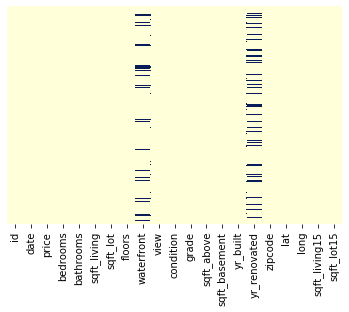

In [8]:
# using a heatmap to visualize where values are missing
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")

`waterfront` and `yr_renovated` clearly need some attention.

In [9]:
# creating a copy of the dataframe for cleaning
data_f = data.copy()

### `waterfront`

In [10]:
# viewing a sampling of rows with null `waterfront` values
data_f[data_f['waterfront'].isna()].tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21578,5087900040,10/17/2014,350000.0,4,2.75,2500,5995,2.0,NaN,0.0,3,8,2500,0.0,2008,0.0,98042,47.3749,-122.107,2530,5988
21582,8956200760,10/13/2014,541800.0,4,2.50,3118,7866,2.0,NaN,2.0,3,9,3118,0.0,2014,0.0,98001,47.2931,-122.264,2673,6500
21586,844000965,6/26/2014,224000.0,3,1.75,1500,11968,1.0,NaN,0.0,3,6,1500,0.0,2014,0.0,98010,47.3095,-122.002,1320,11303
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,0.0,3,8,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


We can inspect a selection of these properties using the `folium` library to verify their proximity to waterfront locations. Plan to convert nulls to 0s, barring controverting discovery.

In [11]:
# Random sampling 5 properties where `waterfront` is null
# wf_nulls = data_f.loc[data_f['waterfront'].isna(), {'waterfront', 'lat', 'long'}]
# random_waterfront = wf_nulls.sample(n=5)
# random_waterfront

"""
	waterfront	lat	long
6159	NaN	47.6058	-122.300
9425	NaN	47.4862	-121.718
12203	NaN	47.6819	-122.389
3677	NaN	47.3357	-122.175
2887	NaN	47.4487	-122.033
"""

# hard - coding to prevent re - sampling on notebook restarts after cleaning data
wf_null_list = [[47.6058, -122.300], [47.4862, -121.718],
                [47.6819, -122.389], [47.3357, -122.175],
                [47.4487, -122.033]]

### Importing necessary libraries

In [12]:
# King County lat./ Long. coordinates: 47.5480° N, -121.9836° W
import os # for access to file directories

import json
import folium # mapping library

# also importing folium's `MarkerCluster` plug-in to group map pins
# when zoomed - out
from folium.plugins import FastMarkerCluster

## Mapping `waterfront` with Folium

In [13]:
# using property coordinates for marker locations
locations = wf_null_list

# getting residences' lat/ lon coordinates to separate lists
lats = [location[0] for location in locations]
lons = [location[1] for location in locations]

# create a map object, centered on the mean coordinates for the residences
m = folium.Map(
    location=[np.mean(lats), np.mean(lons)],
    tiles='Cartodb Positron',
    zoom_start=7
)

# creating a cluster to group all markers on the zoomed - out map
FastMarkerCluster(data=list(zip(lats, lons))).add_to(m)

# adding markers to the map and saving
folium.LayerControl().add_to(m)
m.save(os.path.join('results', '5_MarkerCluster1.html'))

m

These properties are not on the waterfront

In [14]:
# fill `waterfront` nulls with 0s to indicate
# they are not on the waterrfront
data_f.waterfront.fillna(value=0, inplace=True)
data_f.waterfront.dtype

dtype('float64')

This column does not need decimals.
Rounding `waterfront` to a single digit.

In [15]:
# rounding the column down and casting as an integer
data_f.waterfront = data_f.waterfront.round(0).astype('int64')

In [16]:
display(data_f.waterfront.dtype)
data_f[data_f['waterfront'] == 1].head(1)

dtype('int64')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,3/11/2015,1350000.0,3,2.5,2753,65005,1.0,1,2.0,5,9,2165,588.0,1953,0.0,98070,47.4041,-122.451,2680,72513


### `view`

Searching for commonalities among NaN entries for this feature

In [17]:
# setting to view all rows in this set (there are 63)
pd.set_option('display.max_rows', 70)
# viewing rows
data_f.loc[data_f['view'].isna(), (['id', 'date', 'grade', 'view'])]

,id,date,grade,view
7,2008000270,1/15/2015,7,NaN
114,8961960160,10/28/2014,9,NaN
129,7853210060,4/6/2015,7,NaN
205,3456000310,8/4/2014,9,NaN
487,1895000260,7/21/2014,6,NaN
590,2525069041,9/4/2014,7,NaN
938,1324079046,1/20/2015,7,NaN
1313,7558700030,4/13/2015,12,NaN
1364,9468200140,8/19/2014,7,NaN
1701,3121069036,12/8/2014,8,NaN


These properties are highly rated, but have no recorded views. Perhaps they were purchased site - unseen, in the area's competitive market.

I wonder whether any of them have previously been sold? Are any of the IDs duplicated (flipped in a short period of time)?

In [18]:
# instantiating a variable `view` + a few other columns
null_views_df = data_f.loc[data_f['view'].isna(), (['id', 'date', 'grade'])]

# and a variable for duplicate property IDs
duplicate_ids_df = data_f[data_f.duplicated(['id'])]

# counting null views with duplicate IDs
filter_1 = null_views_df.id.isin(duplicate_ids_df.id).sum()
print(filter_1, " null views with duplicate IDs")

0  null views with duplicate IDs


None of the homes with null views have duplicate IDs. This group makes me curious.

Converting these values to 0s, but I may return to this group, depending on our central questions (to be developed in the next notebook section).

In [19]:
# now we can convert null values to 0s
print("Column nulls before processing: ", data_f.view.isna().sum())
data_f['view'].fillna(0, inplace=True)

# verify no null values remain in `view`
print("-"*72, "\nView column nulls after processing: \n", data_f.view.isna().sum())

Column nulls before processing:  63
------------------------------------------------------------------------ 
View column nulls after processing: 
 0


#### Convert the `view` data type

In [20]:
print("Converting from ", data_f.view.dtype, "-"*42)

# convert data type
data_f['view'] = data_f['view'].astype('int64')

print("Converted to ", data_f.view.dtype)

Converting from  float64 ------------------------------------------
Converted to  int64


### `yr_renovated`

* A null value in this column suggests no renovation has been done.
* Boolean values are mixed with years

In [21]:
# limiting number of rows to view
pd.set_option('display.max_rows', 10)

# viewing counts for the column
print("Year renovated null count: ", 
      data.yr_renovated.isna().sum())
print("Year renovated zero count: ", 
      (data.yr_renovated == 0).sum())
# check for odd cases
print("Year renovated negative count: ", 
      (data.yr_renovated < 0).sum())

data_f.yr_renovated.value_counts()

Year renovated null count:  3842
Year renovated zero count:  17011
Year renovated negative count:  0


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

## Features Engineering
### Adding a column to indicate whether or not the home was renovated

Whether the home was renovated interests me more than what year the home was renovated.

In [22]:
# creating a new boolean column
# returning True for `Sqft_basement` > 1 in each row
data_f['Basement'] = (data_f['Sqft_basement'].round() > 1).astype('int64')
data_f.drop(columns='Sqft_basement', inplace=True)

# inspecting dataframe with new `Renovated` column
data_f.head(1)

0    0
Name: Renovated, dtype: int64

Dropping the original `yr_renovated` column.

In [23]:
data_f.drop(columns='yr_renovated', inplace=True)

In [24]:
# inspecting dataframe with new `Renovated` column
data_f.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
0,7129300520,10/13/2014,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0


#### Miss anything that is missing?

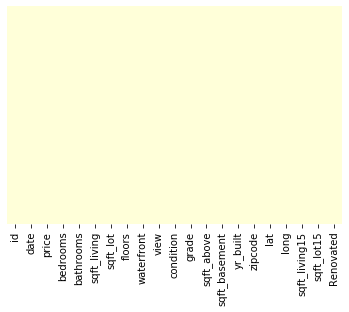

In [25]:
# using a heatmap to visualize where values are missing
sns.heatmap(data_f.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")

Nothing to see, here
***

# Dealing with More Data Types

`zip code`

In [26]:
# convert `zipcode` to string
data_f['zipcode'] = data_f['zipcode'].astype(str)
display(data_f['zipcode'].head(1))

# viewing column data types
data_f.zipcode.dtype

0    98178
Name: zipcode, dtype: object

dtype('O')

`date`

In [27]:
display(data_f.date.dtype)
data_f.date.head(1)

dtype('O')

0    10/13/2014
Name: date, dtype: object

In [28]:
data_f.date = pd.to_datetime(data_f.date)
data_f.date.min()

Timestamp('2014-05-02 00:00:00')

> This data would be more interesting to me if the dates were spread over a longer period of time. As the dates only cover the span of about one year. I will extract the year as an integer.

In [29]:
# convert the date to a year only integer
data_f.date = data_f.date.dt.year.astype('int64')

In [30]:
data_f.date.dtype
data_f.date.head(2)

0    2014
1    2014
Name: date, dtype: int64

`Date`

`grade`

In [31]:
display(data_f.grade.dtype)
data_f.grade.unique()

dtype('int64')

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

`condition`

In [32]:
data_f.condition.dtype
print(data_f.condition.unique())

[3 5 4 1 2]


`sqft_basement`

In [33]:
# check the current type and first rows
print(data_f.sqft_basement.head(10), "\n", "-"*72)
data_f.sqft_basement.describe()

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object 
 ------------------------------------------------------------------------


count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

A question mark, indeed! Can this be calculated using `sqft_living` and `sqft_above`?

In [34]:
# counting question marks
print(data_f.loc[(data_f['sqft_basement'] == '?'), 
                   'sqft_basement'].count(), 
      "question marks in sqft_basement", "\n", "-"*72)

# creating and adding the new column and casting dtype
data_f.insert(15, 'Sqft_basement', data_f['sqft_living'] - 
              data_f['sqft_above'])
data_f.Sqft_basement = data_f.Sqft_basement.astype('int64')

# reporting nulls in and data type of new column
print(data_f['Sqft_basement'].isnull().sum(), 
      "nulls", "\n", "-"*72)
print("Sqft_basement data type: ", data_f['Sqft_basement'].dtype, 
      "\n", "-"*72)

# reporting '?' in 'Sqft_basement' to check new column fill
print(data_f.loc[(data_f['Sqft_basement'] == '?'), 
                   'sqft_basement'].count(), 
      "question marks in Sqft_basement", "\n", "-"*72)

# viewing first rows
data_f.loc[(data_f['sqft_basement'] == '?')].head()

454 question marks in sqft_basement 
 ------------------------------------------------------------------------
0 nulls 
 ------------------------------------------------------------------------
Sqft_basement data type:  int64 
 ------------------------------------------------------------------------
0 question marks in Sqft_basement 
 ------------------------------------------------------------------------


C:\Users\jd\Miniconda3\envs\learn-env\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,Sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
6,1321400060,2014,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,?,1995,0,98003,47.3097,-122.327,2238,6819,0
18,16000397,2014,189000.0,2,1.00,1200,9850,1.0,0,0,4,7,1200,?,1921,0,98002,47.3089,-122.210,1060,5095,0
42,7203220400,2014,861990.0,5,2.75,3595,5639,2.0,0,0,3,9,3595,?,2014,0,98053,47.6848,-122.016,3625,5639,0
79,1531000030,2015,720000.0,4,2.50,3450,39683,2.0,0,0,3,10,3450,?,2002,0,98010,47.3420,-122.025,3350,39750,0
112,2525310310,2014,272500.0,3,1.75,1540,12600,1.0,0,0,4,7,1160,?,1980,380,98038,47.3624,-122.031,1540,11656,0


Casting to new column with calculation successful.

### Drop original `sqft_basement` column

In [35]:
# drop `sqft_basement`
data_f.drop('sqft_basement', axis=1, inplace=True)

# Dealing with Duplicates

In [36]:
# checking for duplicate home IDs (we already sliced these)
print("Duplicated IDs: \n", duplicate_ids_df.shape)
print("-"*80)

# checking for complete row duplicates
print("Completely duplicated entries: \n", 
      len(data_f) 
      - len(data_f.duplicated(subset=None, keep='first')))
print("-"*80)

Duplicated IDs: 
 (177, 21)
--------------------------------------------------------------------------------
Completely duplicated entries: 
 0
--------------------------------------------------------------------------------


There are no completely duplicated rows, though there are duplicate property IDs in the dataset.

Since variables can change for a home from one sale to the next (eg., price, condition, et al.), we will not exclude these duplicate properties.

## Pickle the current - state dataframe

In [37]:
# import the pickle library
import pickle

Store the `data_f` dataframe in a sub - directory of the repository as 'data-f.pickle', before addressing normality and outliers.

In [38]:
with open('data/data-f.pickle', 'wb') as f:
    # Pickling the 'data_f' dataframe using the highest protocol available.
    pickle.dump(data_f, f, pickle.HIGHEST_PROTOCOL)

In [39]:
# copy the dataframe
data_2 = data_f.copy()

# view the first row of the dataframe copy
data_2.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,Sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,Renovated
0,7129300520,2014,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,1955,0,98178,47.5112,-122.257,1340,5650,0


# Data Normality

#### Z-scores, IQRs, and Eyeballs

There are a few ways to go about inspecting normality for a data set feature.
* The z - score indicates how many standard deviations from the mean is a data point.
* The innerquartile range (IQR) rule identifies values that fall outside of the 25th and 75th percentiles by more than 1.5 - times the lower or upper bound.
* We can also look at visualizations to see how our data is distributed and make determinations about where should be our cut - off limits.

## Distributions / Histograms

Let's see what shape our data is in.

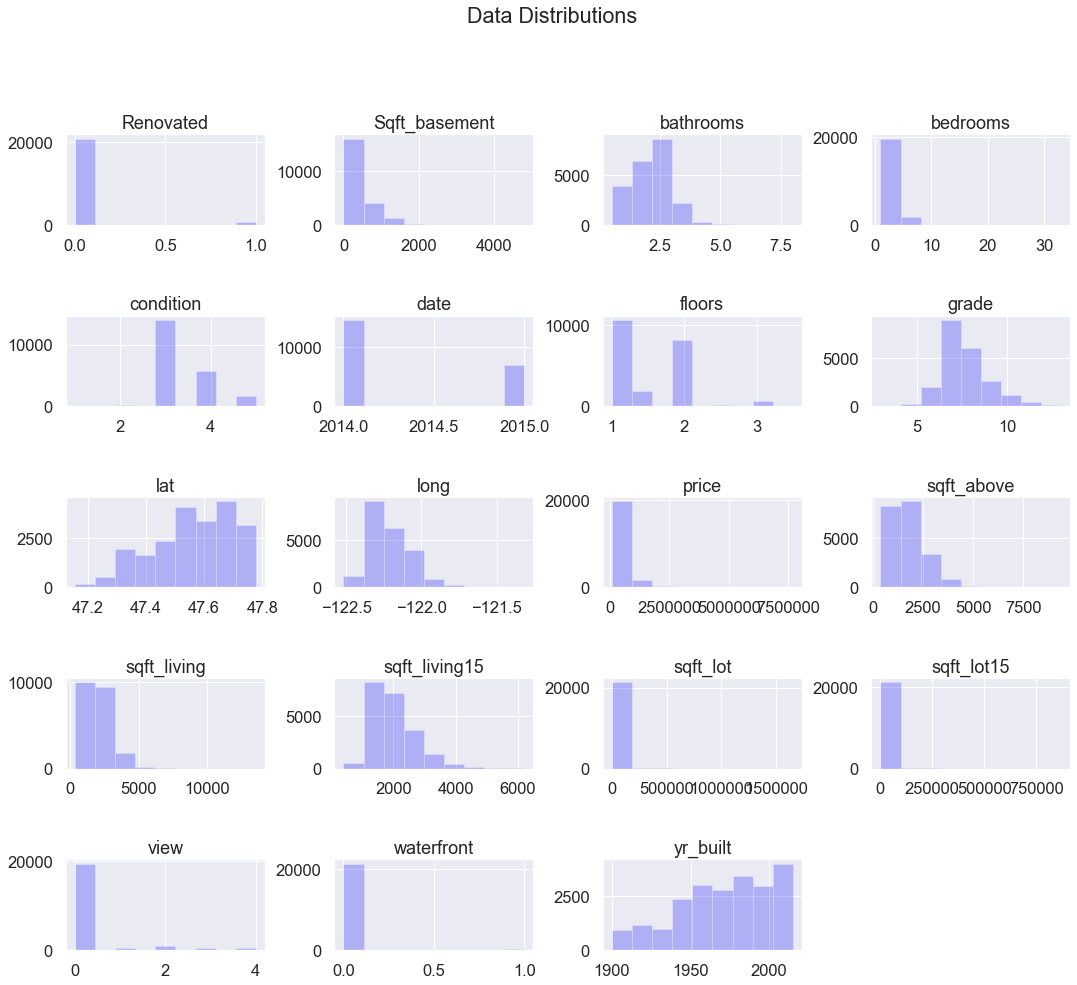

In [40]:
# data_f.hist(grid=False, bins=30)
# selecting plot styling
plt.style.use('seaborn')
sns.set(font_scale=1.5)  # making labels legible

# #plotting histograms in matplotlib
data_2.hist(figsize=(18, 15), bins=9,
            column=[col for col in data_2.drop(['id'], axis=1).columns],
            alpha=.25, color='blue')  # Plot specific columns

plt.subplots_adjust(wspace=.35, hspace=1)
plt.suptitle('Data Distributions', va='bottom')
plt.show()

Many of the data features exhibit positive skew, a sign that they include values (outliers) greater than 3 standard deviations above their respective means. We can view boxplots alongside histograms, to get a better idea about some of these.

<Figure size 576x396 with 0 Axes>

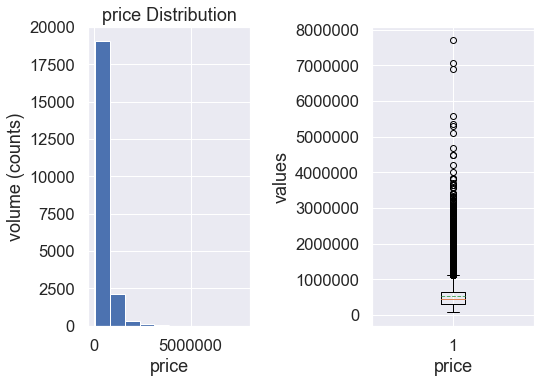

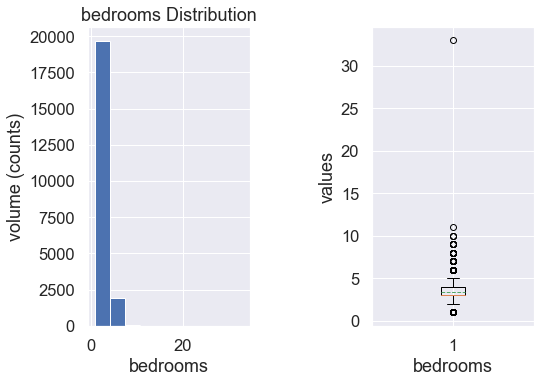

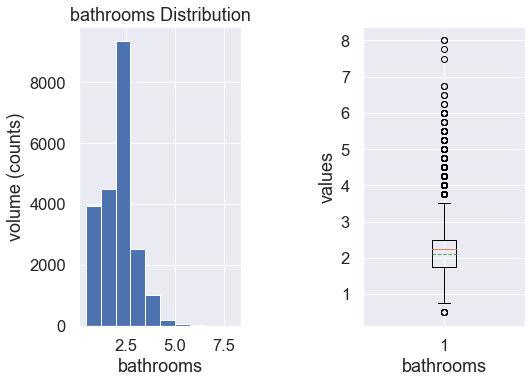

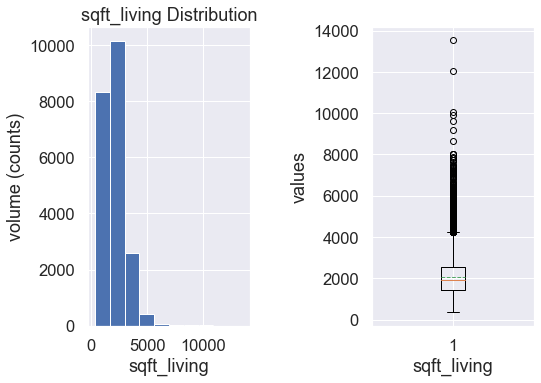

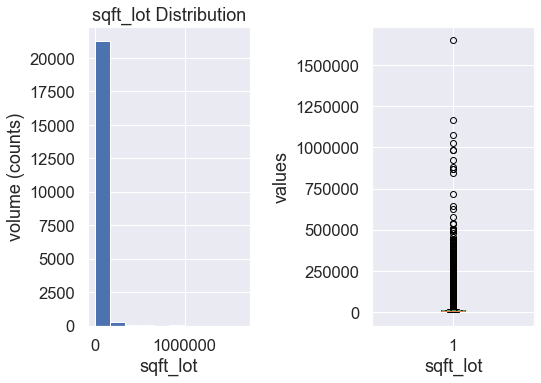

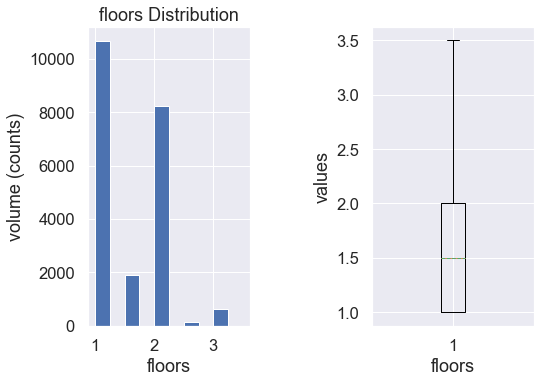

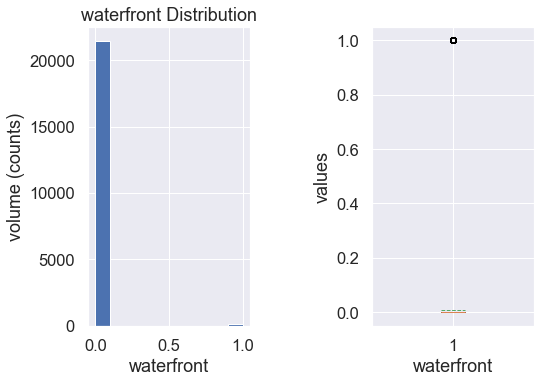

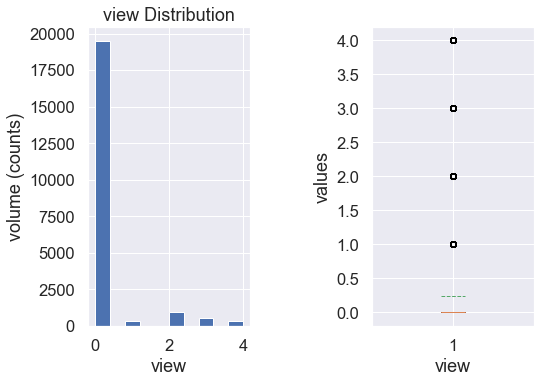

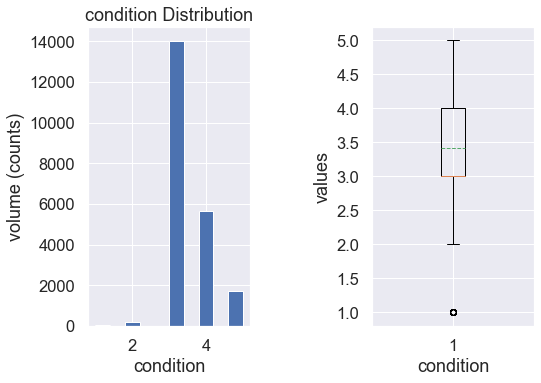

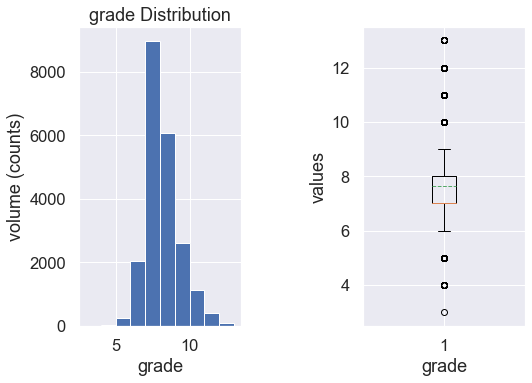

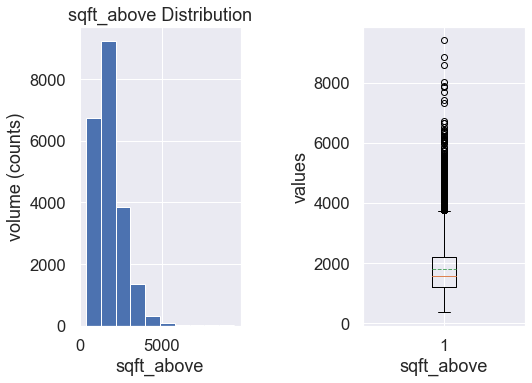

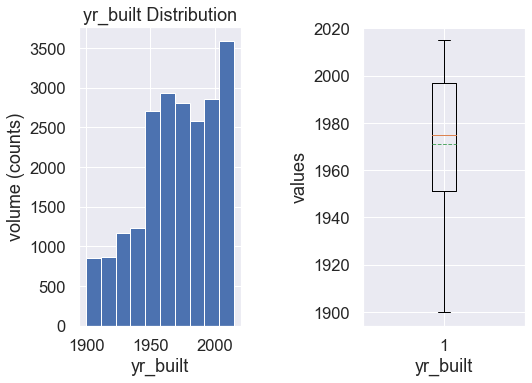

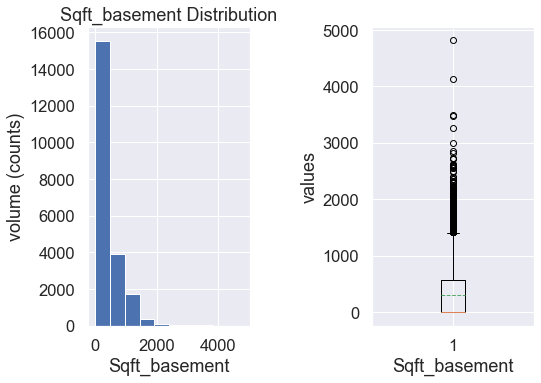

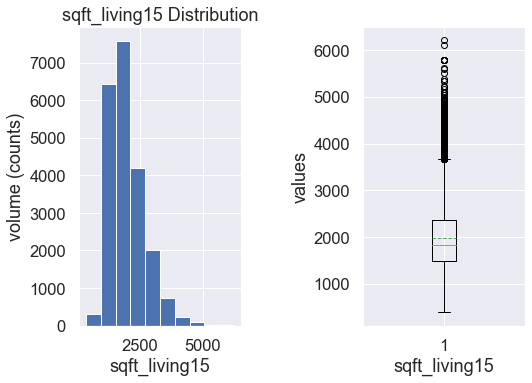

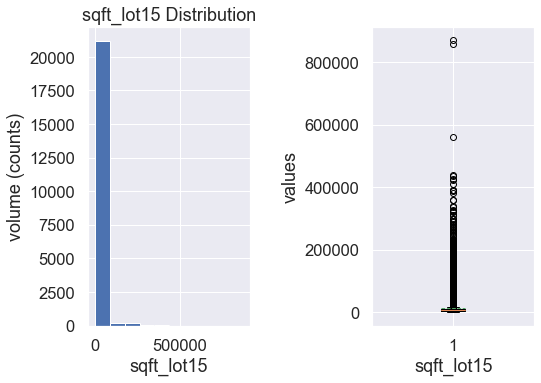

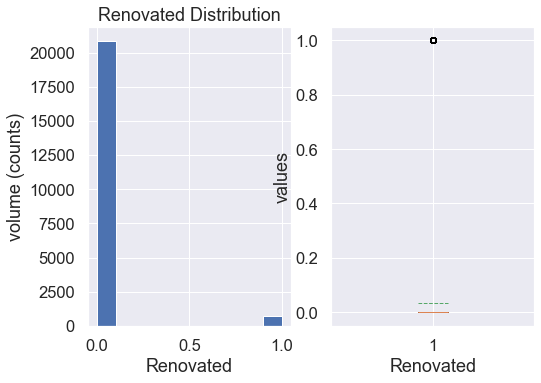

In [41]:
# view histograms and boxplots side - by - side for each column
for col in data_2.columns[2:]:
    if col not in ['lat', 'long', 'zipcode', 'date']:
        # Make the plot
        plt.subplots_adjust(wspace=.75, hspace=.35)
        fig, (ax1, ax2) = plt.subplots(ncols=2)
        ax1.hist(data_2[col])
        ax1.set_xlabel(f"{col}")
        ax1.set_ylabel(r"volume (counts)")
        ax1.set_title(f"{col} Distribution")
        # show a line for mean across the boxplot
        ax2.boxplot(data_2[col], showmeans=True, meanline=True)
        ax2.set_xlabel(f"{col}")
        ax2.set_ylabel(r"values")

plt.show()

We have significant outliers in the data set. The most normal features appear to be the rating scales, `condition` and `grade`. For some of the others, the upper whiskers of the boxplot are so far above the mean that the box shape can barely discribed.

Let's find out how many values are above the upper - bound for their column. Naturally, `id` and `date` columns do not need to be checked.

* We are only concerned with outliers above the mean (greater than 3 standard deviations).
* We do not need to consider boolean features.
* We can omit the quality features, `condition` and `grade`.
* We can also leave out the geo - location features.
* We do not want to change our target, so we will not include it in this operation.

## Dealing with Outliers

Dealing with outliers should help to make our distributions more normal, which in turn will make our model more reliable.

#### Testing a custom formula

In [42]:
'''write a function and test the formula on `sqft`_living
 to count the number or enties greater than 3 - times the 
 standard deviation above the feature's mean
'''
def upper_outliers(dframe, col):
    dtest = dframe[col]

    mean = np.mean(dtest)
    sd = np.std(dtest)
    outliers = dframe[dtest > mean.round(3) + (3*sd)][col]

    print(f"{col}\nmean: {mean.round(3)}", f"| sd: {sd.round(3)}")
    print("Upper - bound: ", mean.round(3) + (3*sd).round(3))
    print("-"*22)
    print("Number of values above the upper - bound: ", 
         dframe[dtest > mean + (3*sd)][col].count())
    print("Lowest column value above the upper bound:", 
          dframe[dtest > mean.round(3) + (3*sd).round(3)][col].min())
    print(f"Upper - bound percentage for {col}",
         dframe[dtest > mean + (3*sd)][col].count())
    print("="*72)
    return dframe[dframe[col] > np.mean(dframe[col])].index

upper_outliers(data_2, 'sqft_lot')

sqft_lot
mean: 15099.409 | sd: 41411.678
Upper - bound:  139334.443
----------------------
Number of values above the upper - bound:  346
Lowest column value above the upper bound: 139392
Upper - bound percentage for sqft_lot 346


Int64Index([    5,    12,    21,    36,    41,    49,    60,    69,    70,
               74,
            ...
            21454, 21468, 21469, 21470, 21478, 21490, 21504, 21509, 21516,
            21532],
           dtype='int64', length=3197)

Look at that: the standard deviation from the mean is greater than 2.74-times the mean, itself, with outliers included.

### Selecting features for outlier anaysis

In [43]:
# instantiate a list of features to analyze
out_check = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'sqft_above',
        'yr_built', 'Sqft_basement', 'sqft_living15', 
       'sqft_lot15']

### Writing a loop to describe outliers

In [44]:
# using the custom formula, create an input
# loop to describe outliers for columns in `out_check`
for col in out_check:
    upper_outliers(data_2, col)

bedrooms
mean: 3.373 | sd: 0.926
Upper - bound:  6.152
----------------------
Number of values above the upper - bound:  62
Lowest column value above the upper bound: 7
Upper - bound percentage for bedrooms 62
bathrooms
mean: 2.116 | sd: 0.769
Upper - bound:  4.423
----------------------
Number of values above the upper - bound:  187
Lowest column value above the upper bound: 4.5
Upper - bound percentage for bathrooms 187
sqft_living
mean: 2080.322 | sd: 918.085
Upper - bound:  4834.577
----------------------
Number of values above the upper - bound:  248
Lowest column value above the upper bound: 4850
Upper - bound percentage for sqft_living 248
sqft_lot
mean: 15099.409 | sd: 41411.678
Upper - bound:  139334.443
----------------------
Number of values above the upper - bound:  346
Lowest column value above the upper bound: 139392
Upper - bound percentage for sqft_lot 346
floors
mean: 1.494 | sd: 0.54
Upper - bound:  3.113
----------------------
Number of values above the upper - bound

Separately, the function identifies 2774 upper - bound outliers. I suspect there is quite a bit of overlap in these results, and that the total count of outlier entries is not cumulative. We shall find out.

## Dropping Outliers

Adapt formulas from the `upper_outliers` function and input loop to remove identified rows from the data set.

In [45]:
# remove `yr_built` from the `out_check` list
out_check.pop(7)

'yr_built'

### Dropping outlier rows in a loop

In [46]:
print(len(data_2), "rows before operation.")

# execute the loop
for c in out_check:
    data_2.drop(data_2[data_2[c] > 
                       (np.mean(data_2[c]) + 
                        3*np.std(data_2[c])
                       )].index, inplace=True)

21597 rows before operation.


In [47]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19322 entries, 0 to 21596
Data columns (total 21 columns):
id               19322 non-null int64
date             19322 non-null int64
price            19322 non-null float64
bedrooms         19322 non-null int64
bathrooms        19322 non-null float64
sqft_living      19322 non-null int64
sqft_lot         19322 non-null int64
floors           19322 non-null float64
waterfront       19322 non-null int64
view             19322 non-null int64
condition        19322 non-null int64
grade            19322 non-null int64
sqft_above       19322 non-null int64
yr_built         19322 non-null int64
Sqft_basement    19322 non-null int64
zipcode          19322 non-null object
lat              19322 non-null float64
long             19322 non-null float64
sqft_living15    19322 non-null int64
sqft_lot15       19322 non-null int64
Renovated        19322 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.2+ MB


## Reviewing Post - drop Distributions

<Figure size 576x396 with 0 Axes>

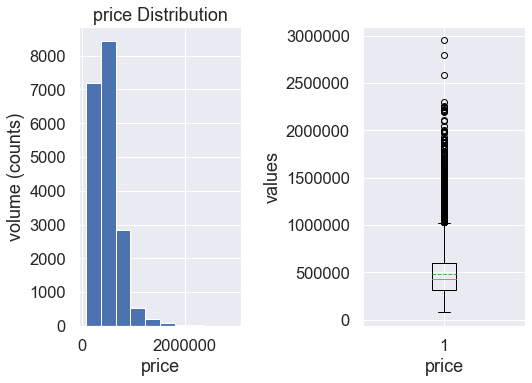

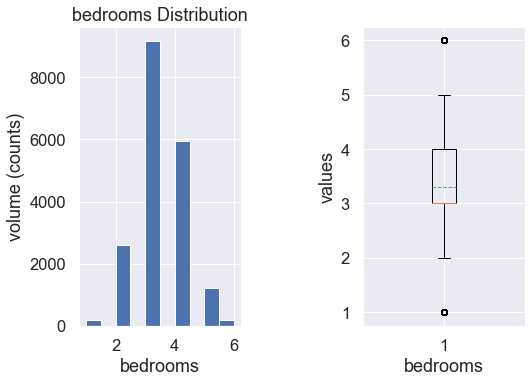

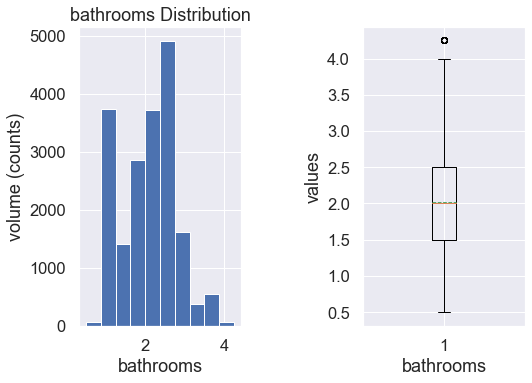

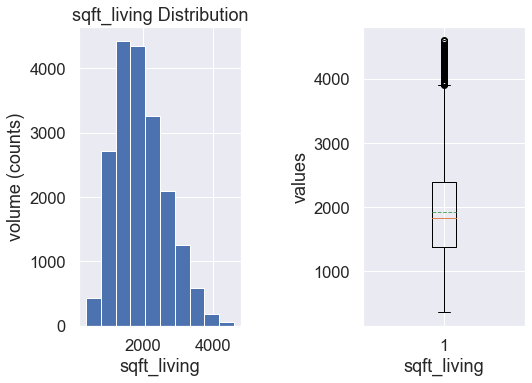

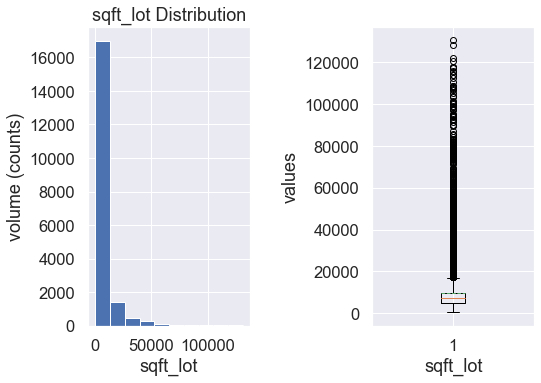

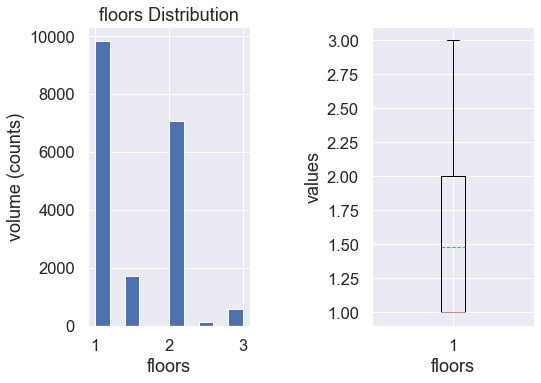

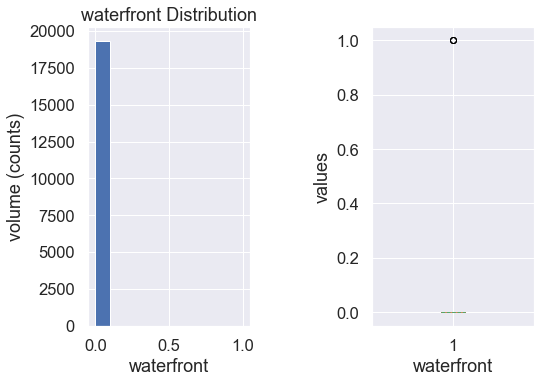

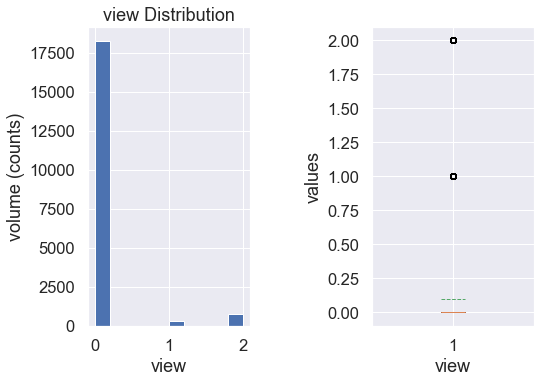

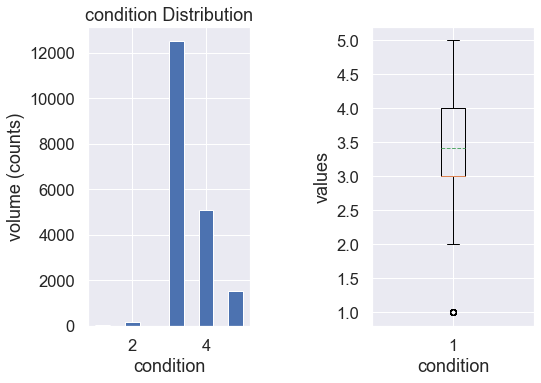

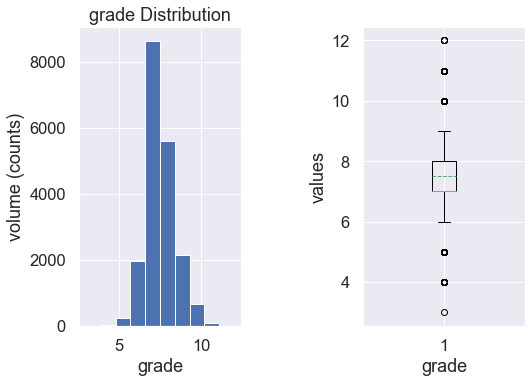

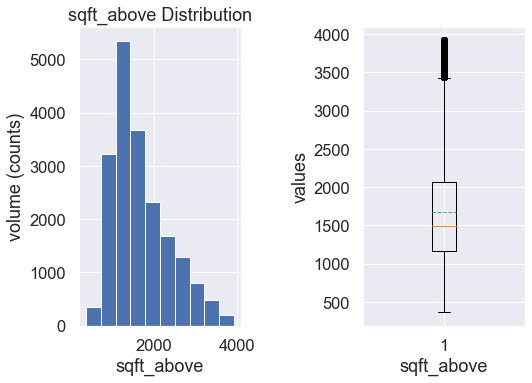

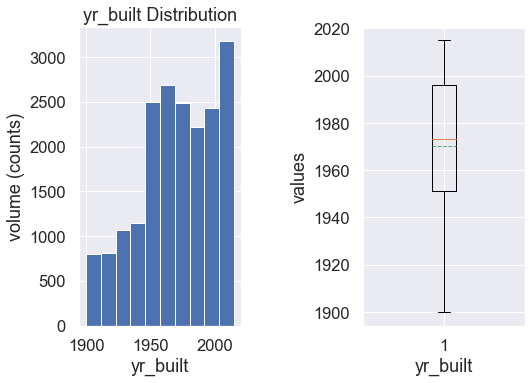

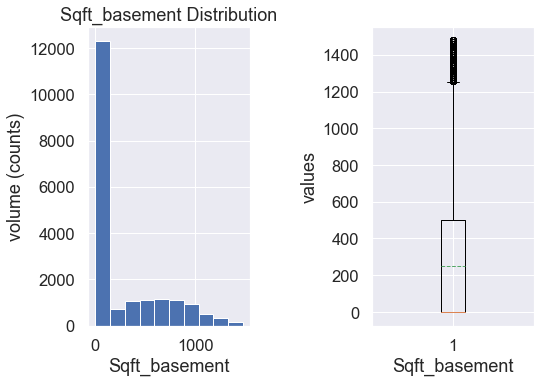

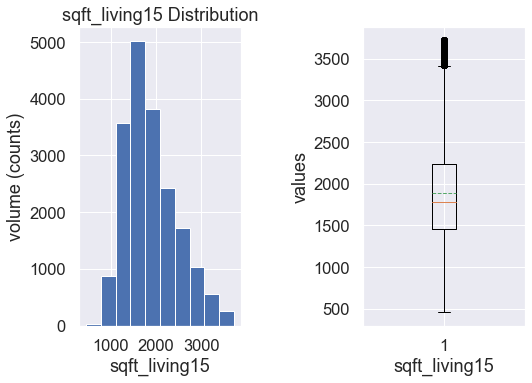

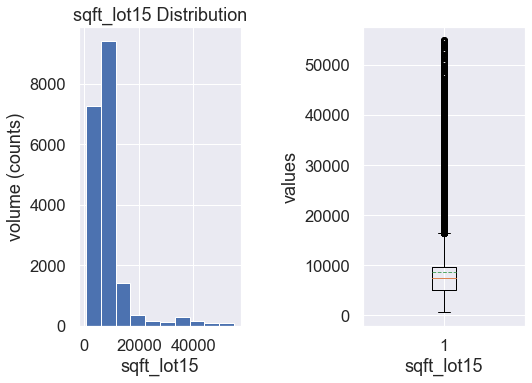

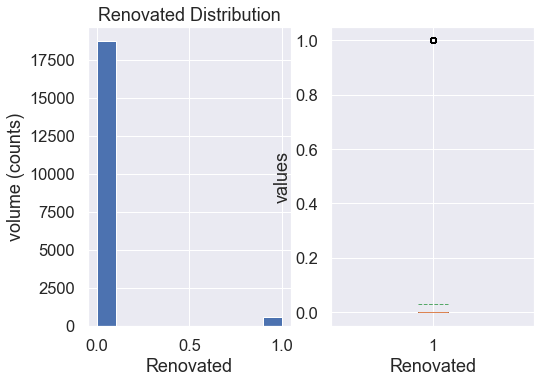

In [48]:
# view histograms and boxplots side - by - side for each column
for col in data_2.columns[2:]:
    if col not in ['lat', 'long', 'zipcode', 'date']:
        # Make the plot
        plt.subplots_adjust(wspace=.75, hspace=.35)
        fig, (ax1, ax2) = plt.subplots(ncols=2)
        ax1.hist(data_2[col])
        ax1.set_xlabel(f"{col}")
        ax1.set_ylabel(r"volume (counts)")
        ax1.set_title(f"{col} Distribution")
        # show a line for mean across the boxplot
        ax2.boxplot(data_2[col], showmeans=True, meanline=True)
        ax2.set_xlabel(f"{col}")
        ax2.set_ylabel(r"values")

plt.show()

It might seem difficult to look at the plot of `sqft_lot15` and think, "that's so much better." However, looking back at the previous plot, one can see a marked improvement.

## Pickle the current - state dataframe for use in the next notebook

In [50]:
with open('data/data-2.pickle', 'wb') as f:
    # Pickling the 'data_2' dataframe using the highest protocol available.
    pickle.dump(data_2, f, pickle.HIGHEST_PROTOCOL)

## Pickles
#### `data-f`: dealt with nulls and data types

#### `data-2`: dealt with outliers for data normalization